In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.cm as cm

In [2]:
1321/5

264.2

In [3]:
def haversine_distance_two(point_A, point_B):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    
    """
    lat1, lon1 = point_A
    lat2, lon2 = point_B
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [4]:
river_sources = pd.read_csv('../data/Lebreton_rivers/PlasticRiverInputs.csv')

In [5]:
river_sources.keys()

Index(['X', 'Y', 'i_mid', 'i_low', 'i_high', 'i_mid_jan', 'i_low_jan',
       'i_high_jan', 'i_mid_feb', 'i_low_feb', 'i_high_feb', 'i_mid_mar',
       'i_low_mar', 'i_high_mar', 'i_mid_apr', 'i_low_apr', 'i_high_apr',
       'i_mid_may', 'i_low_may', 'i_high_may', 'i_mid_jun', 'i_low_jun',
       'i_high_jun', 'i_mid_jul', 'i_low_jul', 'i_high_jul', 'i_mid_aug',
       'i_low_aug', 'i_high_aug', 'i_mid_sep', 'i_low_sep', 'i_high_sep',
       'i_mid_oct', 'i_low_oct', 'i_high_oct', 'i_mid_nov', 'i_low_nov',
       'i_high_nov', 'i_mid_dec', 'i_low_dec', 'i_high_dec', 'runoff_jan',
       'runoff_feb', 'runoff_mar', 'runoff_apr', 'runoff_may', 'runoff_jun',
       'runoff_jul', 'runoff_aug', 'runoff_sep', 'runoff_oct', 'runoff_nov',
       'runoff_dec', 'mpw', 'area'],
      dtype='object')

In [6]:
city_coords = {'Luanda':(-8.82, 13.22),
            'Benguela':(-12.58, 13.39),
            'Cape-Town':(-33.93, 18.56),
            'Buenos-Aires':(-34.58, -58.36),
            'Rio-de-Janeiro':(-23, -43.3),
            'Salvador':(-13, -38.45),
            'Recife':(-8.09, -34.88),
            'Santos(Sao-Paulo)':(-23.98,-46.361),
            'Montevideo':(-34.91, -56.15), 'Pointe-Noire':(-4.8, 11.84)}

In [7]:
def rivers_per_location(DF, loc_coords, radius):
    """
    DF is the River_sources dataframes. loc_coords is the location coordinates.
    radius is the radius of in degrees around loc_coords.
    Returns the dataframe around loc_coords.
    """
    lat, lon = loc_coords
    mask = (DF['X'] <= lon + radius) & (DF['X'] > lon - radius) & (DF['Y'] <= lat + radius) & (DF['Y'] > lat - radius)
    new_DF = DF[mask]
    return new_DF

def region_filters(DF, lon_min, lon_max, lat_min, lat_max):
    """
    DF is the River_sources dataframes. lat_min, lat_max, lon_min, lon_max are the domain limits.
    Returns the dataframe only for the region.
    """
    mask = (DF['X'] <= lon_max) & (DF['X'] > lon_min) & (DF['Y'] <= lat_max) & (DF['Y'] > lat_min)
    new_DF = DF[mask]
    return new_DF

In [8]:
South_Atlantic_region = (-70, 25, -50, -5)

In [9]:
Rio_rivers = rivers_per_location(river_sources, city_coords['Rio-de-Janeiro'], 0.2)

In [10]:
SAG_rivers = region_filters(river_sources, *South_Atlantic_region)

In [11]:
SAG_rivers.shape

(1512, 55)

In [12]:
sorted_rivers = SAG_rivers.sort_values('i_high', ascending=False)

In [13]:
sorted_rivers = sorted_rivers.reset_index()

In [14]:
city_coords["Montevideo"]

(-34.91, -56.15)

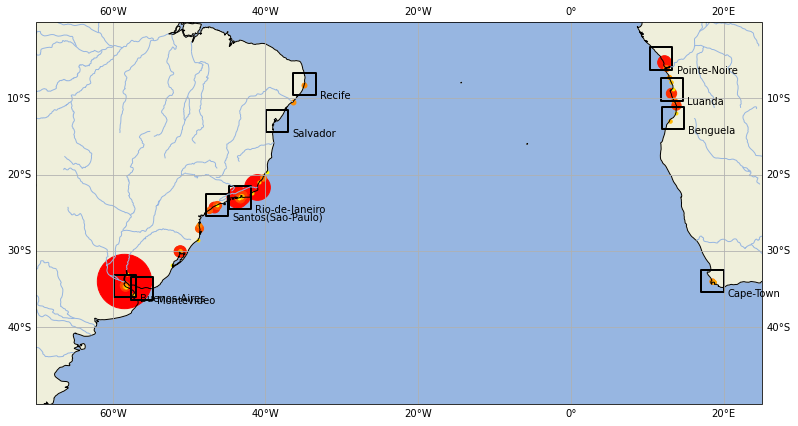

In [15]:
N = 50

x_colors = np.linspace(0, 1, N)
colors = cm.get_cmap('autumn')(x_colors)

fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent((-70, 25, -50, 0), crs=ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.RIVERS)
#ax.plot(nioz_samples['longitude'], nioz_samples['latitude'],'-*', color='white', lw=1, label='Sampling locations');
ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False)
for i in range(N):
    ax.scatter(sorted_rivers['X'][i], sorted_rivers['Y'][i], s=sorted_rivers['i_high'][i]*0.5, color=colors[i])
    
for city in city_coords.keys():
    ax.scatter(city_coords[city][1], city_coords[city][0], 
               s=500, marker='s', linewidths=2, edgecolors='k', facecolor="None")
    ax.text(city_coords[city][1]+2, city_coords[city][0]-2, s=city)

#ax.legend(loc='upper left', shadow=True)

In [16]:
cluster_locations = {'Luanda':(-8.82, 13.22),
                     'Cuvo':(-10.87917, 13.81250),
                     'Paraíba do Sul':(-21.6208, -41.0375),
                     'Itajaí-Açu':(-26.9125, -48.6458),
                     'Chiloango-Congo':(-5.6442, 12.1375),
                    'Cape-Town':(-33.93, 18.56),
                    'Rio-de-la-Plata':(-33.9375, -58.5208),
                    'Rio-de-Janeiro':(-23.01250, -43.32083),
                    'Porto-Alegre':(-30.051, -51.285),
                    'Santos':(-23.9875, -46.2958)}

In [17]:
import pickle
f = open("../../South_Atlantic_Gyre_experiment/river_sources .pkl","wb")
pickle.dump(dict,f)
f.close()

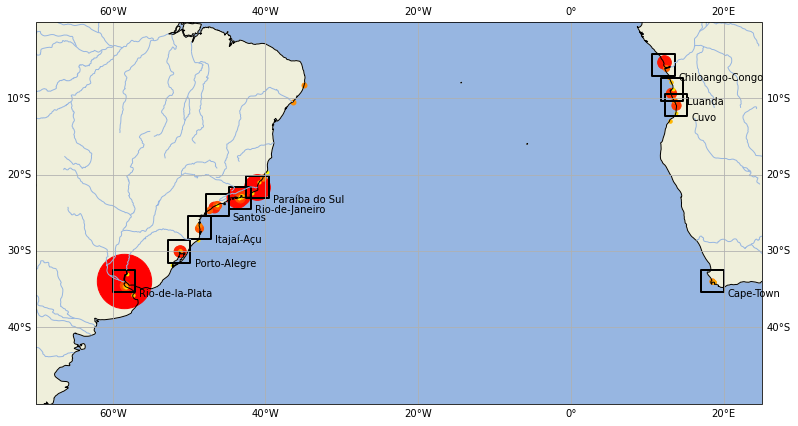

In [18]:
N = 50

x_colors = np.linspace(0, 1, N)
colors = cm.get_cmap('autumn')(x_colors)

fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent((-70, 25, -50, 0), crs=ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.RIVERS)
#ax.plot(nioz_samples['longitude'], nioz_samples['latitude'],'-*', color='white', lw=1, label='Sampling locations');
ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False)
for i in range(N):
    ax.scatter(sorted_rivers['X'][i], sorted_rivers['Y'][i], s=sorted_rivers['i_high'][i]*0.5, color=colors[i])
    
for city in cluster_locations.keys():
    ax.scatter(cluster_locations[city][1], cluster_locations[city][0], 
               s=500, marker='s', linewidths=2, edgecolors='k', facecolor="None")
    ax.text(cluster_locations[city][1]+2, cluster_locations[city][0]-2, s=city)

#ax.legend(loc='upper left', shadow=True)

In [19]:
anual_totals = sorted_rivers[['i_high','i_mid','i_low']].sum()

In [20]:
cluster_percentage = {}
for loc in cluster_locations:
    loc_df = rivers_per_location(sorted_rivers, cluster_locations[loc], 1)
    high = loc_df['i_high'].sum()/anual_totals['i_high']
    mid = loc_df['i_mid'].sum()/anual_totals['i_mid']
    low = loc_df['i_low'].sum()/anual_totals['i_low']
    avg = (high+mid+low)/3
    print(loc, 'high', high, 'mid', mid, 'low', low)

    cluster_percentage[loc] = [high, mid, low, avg]

Luanda high 0.020474653362136195 mid 0.017871260999627867 low 0.015618951472831223
Cuvo high 0.018263672377704956 mid 0.01598985468952484 low 0.013983317587125793
Paraíba do Sul high 0.10673019688598634 mid 0.10902416365159528 low 0.1100966527782878
Itajaí-Açu high 0.01616238017893166 mid 0.013056709953258373 low 0.010634277414523151
Chiloango-Congo high 0.03606659498756525 mid 0.03238779154480079 low 0.02902599836884016
Cape-Town high 0.010059961207803881 mid 0.008201220305075873 low 0.006719785736667106
Rio-de-la-Plata high 0.4892183585211468 mid 0.5322888835283868 low 0.5695150425698737
Rio-de-Janeiro high 0.17364319143486714 mid 0.16555694214350625 low 0.1571215384259714
Porto-Alegre high 0.041183708986438895 mid 0.03604213254071614 low 0.03150987528179242
Santos high 0.030768315158295728 mid 0.02644333754972976 low 0.02276756998542007


In [21]:
priors = pd.DataFrame(cluster_percentage).T
priors = priors.rename(columns={0:'i_high', 1:'i_mid', 2:'i_low', 3:'Mean'})
priors = priors.sort_values('i_high', ascending=False)

In [22]:
aux = pd.DataFrame({'OTHER': 1 - priors.sum().values}).T #'CLUSTERS-TOTAL': priors.sum().values, 
aux = aux.rename(columns={0:'i_high', 1:'i_mid', 2:'i_low', 3:'Mean'})

In [23]:
priors = pd.concat([priors, aux], axis=0)

In [24]:
priors

,i_high,i_mid,i_low,Mean
Rio-de-la-Plata,0.489218,0.532289,0.569515,0.530341
Rio-de-Janeiro,0.173643,0.165557,0.157122,0.165441
Paraíba do Sul,0.106730,0.109024,0.110097,0.108617
Porto-Alegre,0.041184,0.036042,0.031510,0.036245
Chiloango-Congo,0.036067,0.032388,0.029026,0.032493
Santos,0.030768,0.026443,0.022768,0.026660
Luanda,0.020475,0.017871,0.015619,0.017988
Cuvo,0.018264,0.015990,0.013983,0.016079
Itajaí-Açu,0.016162,0.013057,0.010634,0.013284
Cape-Town,0.010060,0.008201,0.006720,0.008327


In [25]:
priors.to_csv('../../South_Atlantic_Gyre_experiment/data/river_inputs.csv')

In [30]:
from matplotlib import cm

In [35]:
cs=cm.tab20(np.arange(11)/11.)

Text(0.5, 1.0, 'Mean')

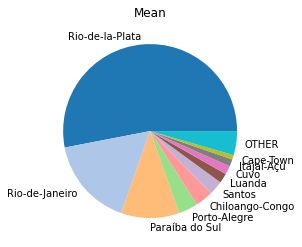

In [36]:
plt.pie(priors['Mean'], labels=priors.index, colors=cs);
plt.title('Mean')

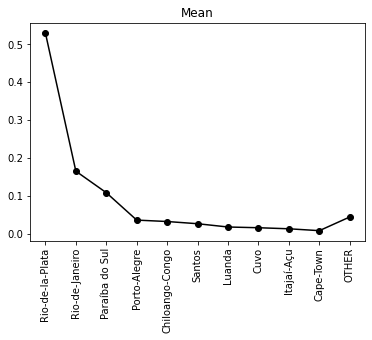

In [25]:
plt.plot(priors['Mean'], 'ko-');
plt.title('Mean')
plt.xticks(rotation= 90);

In [26]:
priors.sum()

i_high    1.0
i_mid     1.0
i_low     1.0
Mean      1.0
dtype: float64

/opt/miniconda3/envs/py3_parcels/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'i_high')

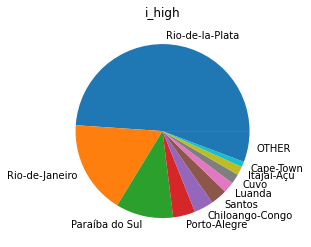

In [27]:
plt.pie(priors['i_high'], labels=priors.index);
plt.title('i_high')

Text(0.5, 1.0, 'i_mid')

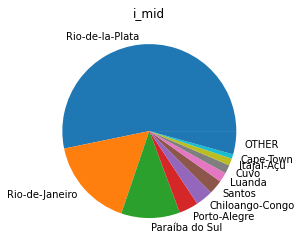

In [28]:
plt.pie(priors['i_mid'], labels=priors.index);
plt.title('i_mid')

In [29]:
cluster_locations

{'Luanda': (-8.82, 13.22),
 'Cuvo': (-10.87917, 13.8125),
 'Paraíba do Sul': (-21.6208, -41.0375),
 'Itajaí-Açu': (-26.9125, -48.6458),
 'Chiloango-Congo': (-5.6442, 12.1375),
 'Cape-Town': (-33.93, 18.56),
 'Rio-de-la-Plata': (-33.9375, -58.5208),
 'Rio-de-Janeiro': (-23.0125, -43.32083),
 'Porto-Alegre': (-30.051, -51.285),
 'Santos': (-23.9875, -46.2958)}

/opt/miniconda3/envs/py3_parcels/lib/python3.6/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 


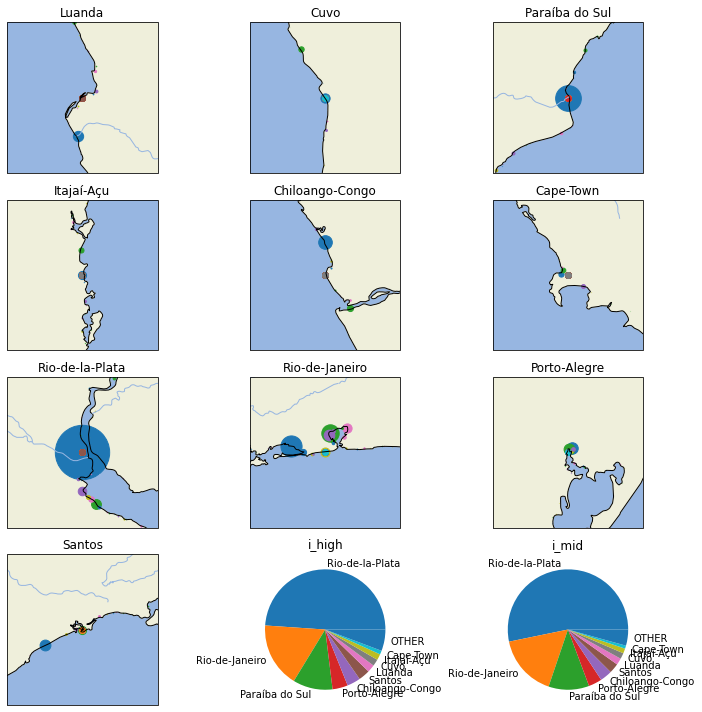

In [30]:
fig,ax = plt.subplots(ncols=3,nrows=4,figsize=(10,10),
                      subplot_kw={'projection': ccrs.PlateCarree()})
r = 1
i = 0
for k, loc in enumerate(cluster_locations):
    j = k%3
    lat_BA, lon_BA = cluster_locations[loc]
    
    ax[i,j].set_extent([lon_BA-r, lon_BA+r, lat_BA-r, lat_BA+r], crs=ccrs.PlateCarree())
    ax[i,j].add_feature(cfeature.OCEAN)
    ax[i,j].add_feature(cfeature.LAND)
    ax[i,j].add_feature(cfeature.COASTLINE)
    ax[i,j].add_feature(cfeature.RIVERS)
    ax[i,j].set_title(loc)
#     ax[i,j].scatter(lon_BA, lat_BA, s=sorted_rivers['i_high'][k])
    

    loc_df = rivers_per_location(sorted_rivers, cluster_locations[loc], 1)
    for m in loc_df.index:
        ax[i,j].scatter(loc_df['X'][m], loc_df['Y'][m], s=loc_df['i_high'][m]*0.5)
        ax[i,j].scatter(cluster_locations[loc][1], cluster_locations[loc][0])
        
    #print(f'({lat_BA:0.5f}, {lon_BA:0.5f})')
    if j%3 == 2: i+=1 

ax[3,1].pie(priors['i_high'], labels=priors.index);
ax[3,1].set_title('i_high');
ax[3,2].pie(priors['i_mid'], labels=priors.index);
ax[3,2].set_title('i_mid');
plt.tight_layout()

In [97]:
parcels_origin = {'Luanda': (-9.3, 13.),
                 'Cuvo': (-10.87917, 13.7),
                 'Paraíba do Sul': (-21.6208, -40.9),
                 'Itajaí-Açu': (-26.9125, -48.5),
                 'Chiloango-Congo': (-5.6442, 12.05),
                 'Cape-Town': (-33.93, 18.2),
                 'Rio-de-la-Plata': (-34.3, -58.2),
                 'Rio-de-Janeiro': (-23.1, -43.32083),
                 'Porto-Alegre': (-32.15, -51.9),
                 'Santos': (-24.05, -46.2958)}

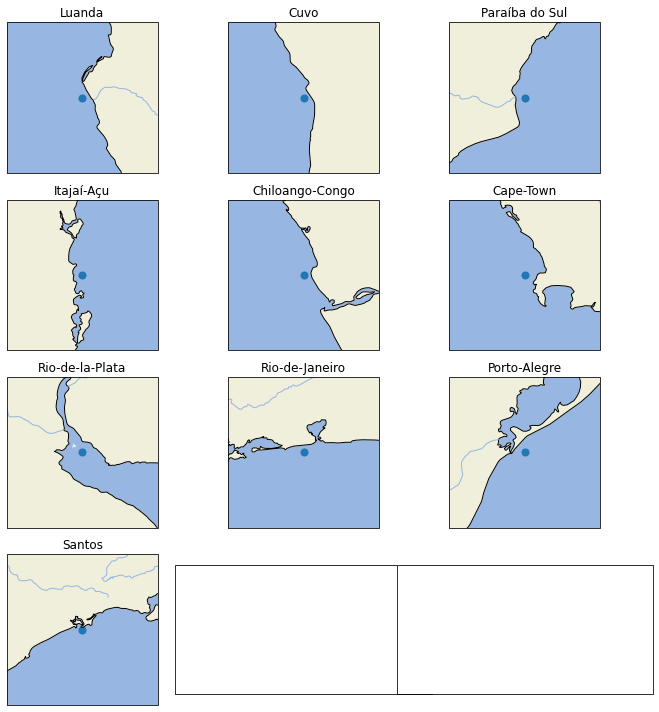

In [98]:
fig,ax = plt.subplots(ncols=3,nrows=4,figsize=(10,10),
                      subplot_kw={'projection': ccrs.PlateCarree()})
r = 1
i = 0
for k, loc in enumerate(parcels_origin):
    j = k%3
    lat_BA, lon_BA = parcels_origin[loc]
    
    ax[i,j].set_extent([lon_BA-r, lon_BA+r, lat_BA-r, lat_BA+r], crs=ccrs.PlateCarree())
    ax[i,j].add_feature(cfeature.OCEAN)
    ax[i,j].add_feature(cfeature.LAND)
    ax[i,j].add_feature(cfeature.COASTLINE)
    ax[i,j].add_feature(cfeature.RIVERS)
    ax[i,j].set_title(loc)
    ax[i,j].scatter(lon_BA, lat_BA, s=50)
    
    if j%3 == 2: i+=1 

plt.tight_layout()

In [101]:
import pickle
f = open("../../South_Atlantic_Gyre_experiment/river_sources.pkl","wb")
pickle.dump(parcels_origin, f)
f.close()

In [105]:
infile = open("../../South_Atlantic_Gyre_experiment/river_sources.pkl",'rb')
pickle.load(infile)

{'Luanda': (-9.3, 13.0),
 'Cuvo': (-10.87917, 13.7),
 'Paraíba do Sul': (-21.6208, -40.9),
 'Itajaí-Açu': (-26.9125, -48.5),
 'Chiloango-Congo': (-5.6442, 12.05),
 'Cape-Town': (-33.93, 18.2),
 'Rio-de-la-Plata': (-34.3, -58.2),
 'Rio-de-Janeiro': (-23.1, -43.32083),
 'Porto-Alegre': (-32.15, -51.9),
 'Santos': (-24.05, -46.2958)}

In [99]:
total_plastic = sorted_rivers['i_low'].sum()


In [67]:
percent = sorted_rivers['i_low']/total_plastic

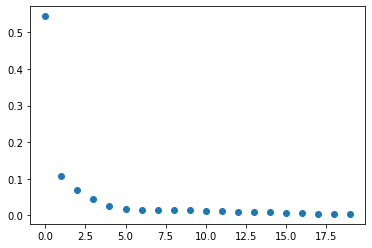

In [68]:
plt.scatter(sorted_rivers.index[:20], percent[:20])

In [72]:
percent[:100].sum()

0.9950030647449724

In [74]:
rivers_per_location(sorted_rivers, city_coords['Buenos-Aires'], 0.1)

fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-60, 25, -50, -5], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
#ax.plot(nioz_samples['longitude'], nioz_samples['latitude'],'-*', color='white', lw=1, label='Sampling locations');
ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False)
for i in range(10):
    ax.scatter(sorted_rivers['X'][i], sorted_rivers['Y'][i], label=i)
ax.legend(loc='upper left', shadow=True)

,index,X,Y,i_mid,i_low,i_high,i_mid_jan,i_low_jan,i_high_jan,i_mid_feb,...,runoff_may,runoff_jun,runoff_jul,runoff_aug,runoff_sep,runoff_oct,runoff_nov,runoff_dec,mpw,area
10,38290,-58.345833,-34.629167,77.845779,44.180450,192.495834,10.422643,6.008263,25.309615,9.433189,...,0.223035,0.193547,0.289152,0.214124,0.312134,0.478430,0.708439,0.570747,41558000.0,2.198400e+09
21,38284,-58.412500,-34.554167,21.795396,11.489428,58.416516,2.309275,1.220010,6.167852,3.517264,...,0.795466,0.578751,0.622888,0.533232,0.786843,1.225536,1.594427,1.671067,6489540.0,9.750000e+07
31,38283,-58.445833,-34.529167,11.470048,5.825765,32.015459,1.219763,0.621038,3.391931,1.852552,...,0.771929,0.564917,0.614317,0.521692,0.772237,1.199186,1.564824,1.626973,4356670.0,6.790000e+07
43,38294,-58.304167,-34.670833,5.877148,2.867302,17.139696,0.644844,0.316428,1.866874,0.647986,...,0.290929,0.274303,0.342336,0.259121,0.348007,0.543149,0.800172,0.734238,6640500.0,1.840000e+08


In [95]:
rivers_per_location(sorted_rivers, city_coords['Buenos-Aires'], 0.10)

,index,X,Y,i_mid,i_low,i_high,i_mid_jan,i_low_jan,i_high_jan,i_mid_feb,...,runoff_may,runoff_jun,runoff_jul,runoff_aug,runoff_sep,runoff_oct,runoff_nov,runoff_dec,mpw,area
10,38290,-58.345833,-34.629167,77.845779,44.180450,192.495834,10.422643,6.008263,25.309615,9.433189,...,0.223035,0.193547,0.289152,0.214124,0.312134,0.478430,0.708439,0.570747,41558000.0,2.198400e+09
21,38284,-58.412500,-34.554167,21.795396,11.489428,58.416516,2.309275,1.220010,6.167852,3.517264,...,0.795466,0.578751,0.622888,0.533232,0.786843,1.225536,1.594427,1.671067,6489540.0,9.750000e+07
31,38283,-58.445833,-34.529167,11.470048,5.825765,32.015459,1.219763,0.621038,3.391931,1.852552,...,0.771929,0.564917,0.614317,0.521692,0.772237,1.199186,1.564824,1.626973,4356670.0,6.790000e+07
43,38294,-58.304167,-34.670833,5.877148,2.867302,17.139696,0.644844,0.316428,1.866874,0.647986,...,0.290929,0.274303,0.342336,0.259121,0.348007,0.543149,0.800172,0.734238,6640500.0,1.840000e+08


In [80]:
len(sorted_rivers)

1218

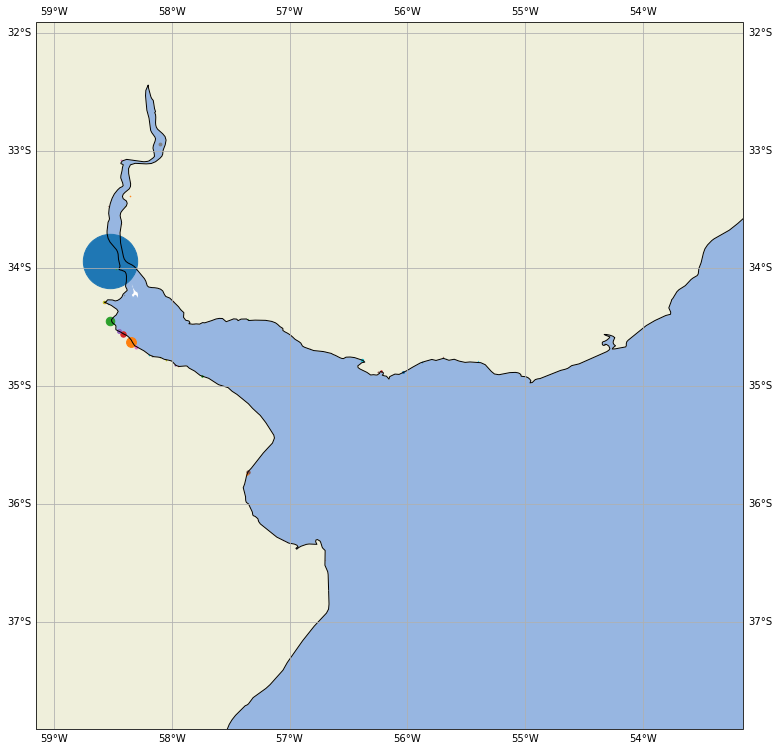

In [115]:
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

lat_BA, lon_BA = city_coords['Montevideo']
r = 3
ax.set_extent([lon_BA-r, lon_BA+r, lat_BA-r, lat_BA+r], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
#ax.plot(nioz_samples['longitude'], nioz_samples['latitude'],'-*', color='white', lw=1, label='Sampling locations');
ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False)

rivers = rivers_per_location(sorted_rivers, city_coords['Buenos-Aires'], r)
for i in rivers.index:
    ax.scatter(rivers['X'][i], rivers['Y'][i], label=i, s=rivers['i_high'][i]*0.5)
#ax.legend(loc='upper left', shadow=True)

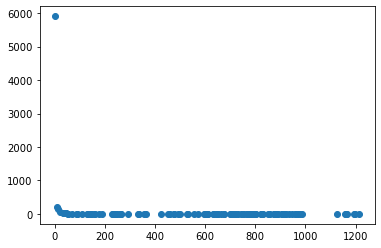

In [103]:
plt.scatter(rivers.index, rivers['i_high'])

In [108]:
len(city_coords)

9

In [320]:
river_names ={'Parana Guazu':(-33.9375, -58.5208), #Rio de la Plata
                'Paraíba do Sul':(-21.6208, -41.0375), #Brazil
                'Guandu':(-22.9292, -43.7792), # Rio de Janeiro
                'Rio Iguaçu':(-22.7625, -43.2542), # Rio de Janeiro
                'Chiloango':(-5.2042, 12.1375), #Angola
                'Jacuí':(-29.9958, -51.2292), #Porto Alegre
                'Itanhaem':(-24.1875, -46.7875), #Santos
                'Jacuí':(-30.0125, -51.2708), #Porto Alegre
                'Pavuna':(-22.7875, -43.2708), # Rio de Janeiro
                'Cuanza':(-9.3292, 13.1625), # Angola
                'Matanza':(-34.6292, -58.3458), #Rio de la Plata
                'Cuvo':(-10.8792, 13.8125), # Angola
                'Macacu':(-22.6958, -43.0375), #Rio
                'Lagoa de Ticuja':(-23.0125, -43.3208), #Rio de Janeiro
                'Luján':(-34.4458, -58.5208), #Rio de la Plata
                'Santos':(-23.9875, -46.2958), #Santos
                'Itajaí-Açu':(-26.9125, -48.6458), #Itajai
                'Valao':(-23.0125, -43.6125), #Rio de Janeiro
                'Ribeira de Iguape':(-24.6375, -47.3875), #Brazil
                'Congo': (-6.0792, 12.4708),
                'Jucu':(-20.4042, -40.3208), #Itaparica Beach
                'Buenos Aires?':(-34.5542, -58.4125),
                '?':(-10.2375, 13.4875), #Angola
                'Santa Maria da Vitoria':(-20.3208, -40.3208), #Itaparica Beach
                'Cape Town':(-33.9125, 18.4708)}

In [322]:
len(river_names)

24

(-33.93750, -58.52083)
(-21.62083, -41.03750)
(-22.92917, -43.77917)
(-22.76250, -43.25417)
(-5.20417, 12.13750)
(-29.99583, -51.22917)
(-24.18750, -46.78750)
(-30.01250, -51.27083)
(-22.78750, -43.27083)
(-9.32917, 13.16250)
(-34.62917, -58.34583)
(-10.87917, 13.81250)
(-22.69583, -43.03750)
(-23.01250, -43.32083)
(-34.44583, -58.52083)
(-23.98750, -46.29583)
(-26.91250, -48.64583)
(-23.01250, -43.61250)
(-24.63750, -47.38750)
(-6.07917, 12.47083)
(-20.40417, -40.32083)
(-34.55417, -58.41250)
(-10.23750, 13.48750)
(-20.32083, -40.32083)
(-33.91250, 18.47083)


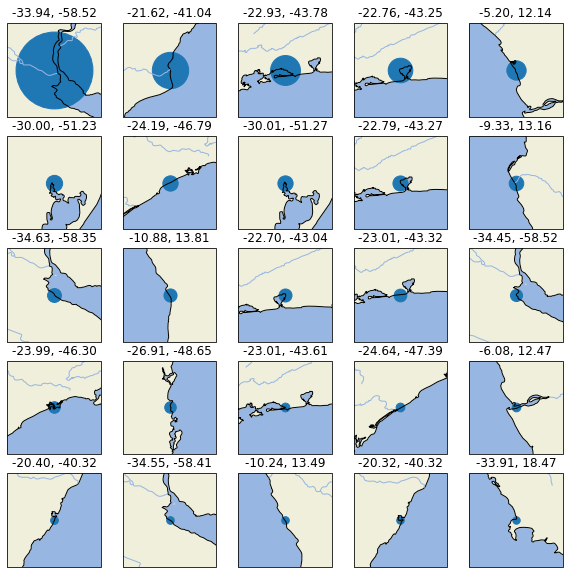

In [331]:
fig,ax = plt.subplots(ncols=5,nrows=5,figsize=(10,10),
                      subplot_kw={'projection': ccrs.PlateCarree()})
r = 1
i = 0
for k in range(25):
    j = k%5
    lat_BA, lon_BA = sorted_rivers['Y'][k], sorted_rivers['X'][k]
    ax[i,j].set_extent([lon_BA-r, lon_BA+r, lat_BA-r, lat_BA+r], crs=ccrs.PlateCarree())
    ax[i,j].add_feature(cfeature.OCEAN)
    ax[i,j].add_feature(cfeature.LAND)
    ax[i,j].add_feature(cfeature.COASTLINE)
    ax[i,j].add_feature(cfeature.RIVERS)
    ax[i,j].set_title(f'{lat_BA:0.2f}, {lon_BA:0.2f}')
    ax[i,j].scatter(lon_BA, lat_BA, s=sorted_rivers['i_high'][k])
    
#     rivers = rivers_per_location(sorted_rivers, (lat_BA, lon_BA), r)
#     for m in rivers.index:
#         ax[i,j].scatter(rivers['X'][m], rivers['Y'][m], label=i, s=rivers['i_high'][m]*0.5)
    print(f'({lat_BA:0.5f}, {lon_BA:0.5f})')
    if j%5 == 4: i+=1 
